In [1]:
import numpy as np 
import pandas as pd 
import nltk
import tensorflow as tf

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [4]:
data = pd.read_csv('UpdatedResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Blockchain                   40
Sales                        40
Mechanical Engineer          40
Data Science                 40
ETL Developer                40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


In [6]:
import re

def cleanResume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)
    Text = re.sub('RT|cc', ' ', Text)
    Text = re.sub('#\S+', '', Text)
    Text = re.sub('@\S+', '  ', Text)
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)
    Text = re.sub(r'[^\x00-\x7f]',r' ', Text) 
    Text = re.sub('\s+', ' ', Text)
    return Text

data['cleaned_resume'] = ''  
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [7]:
data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [8]:
for i in range(962):
  str = data.Category[i]
  for j in range(len(str)):
    str = str.replace(" ", "")
  data.Category[i] = str

In [9]:
data.head()

,Category,Resume,cleaned_resume
0,DataScience,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,DataScience,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,DataScience,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,DataScience,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,DataScience,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [10]:
sentences = list(data.cleaned_resume)

In [11]:
print(data.Category.unique())

['DataScience' 'HR' 'Advocate' 'Arts' 'WebDesigning' 'MechanicalEngineer'
 'Sales' 'Healthandfitness' 'CivilEngineer' 'JavaDeveloper'
 'BusinessAnalyst' 'SAPDeveloper' 'AutomationTesting'
 'ElectricalEngineering' 'OperationsManager' 'PythonDeveloper'
 'DevOpsEngineer' 'NetworkSecurityEngineer' 'PMO' 'Database' 'Hadoop'
 'ETLDeveloper' 'DotNetDeveloper' 'Blockchain' 'Testing']


In [12]:
print(len(sentences))

962


In [13]:
for idx in range(len(sentences)):
  sentence = sentences[idx]
  for word in stopwords:
    token = " " + word + " "
    sentence = sentence.replace(token, " ")
    sentence = sentence.replace("  ", " ")
  sentences[idx] = sentence

In [14]:
labels = list(data.Category)

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 30000
embedding_dim = 32
max_length = 1024

In [16]:
import matplotlib.pyplot as plt


def plot_history(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, train_size = 0.8, random_state = 1, shuffle = True)

In [18]:
tokenizer = Tokenizer(num_words = 15000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=max_length)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=max_length)

In [19]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_index = label_tokenizer.word_index

In [20]:
print(label_index)

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'datascience': 8, 'mechanicalengineer': 9, 'sales': 10, 'operationsmanager': 11, 'etldeveloper': 12, 'blockchain': 13, 'arts': 14, 'database': 15, 'healthandfitness': 16, 'electricalengineering': 17, 'pmo': 18, 'businessanalyst': 19, 'dotnetdeveloper': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'civilengineer': 23, 'sapdeveloper': 24, 'advocate': 25}


In [21]:
y_train_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
y_test_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

In [22]:
print(y_train_label_seq)

[[13]
 [ 9]
 [ 7]
 [ 2]
 [ 7]
 [17]
 [ 9]
 [ 3]
 [ 2]
 [ 1]
 [24]
 [ 5]
 [ 8]
 [20]
 [25]
 [22]
 [ 3]
 [21]
 [11]
 [13]
 [22]
 [14]
 [11]
 [ 5]
 [ 7]
 [12]
 [ 2]
 [11]
 [13]
 [15]
 [14]
 [ 9]
 [ 6]
 [21]
 [ 4]
 [14]
 [18]
 [ 9]
 [14]
 [18]
 [ 3]
 [11]
 [ 8]
 [15]
 [ 7]
 [ 7]
 [23]
 [ 1]
 [ 5]
 [18]
 [19]
 [ 3]
 [ 3]
 [13]
 [19]
 [14]
 [ 1]
 [ 8]
 [12]
 [ 6]
 [ 7]
 [20]
 [19]
 [ 4]
 [ 3]
 [18]
 [13]
 [ 4]
 [20]
 [ 6]
 [ 9]
 [11]
 [16]
 [ 1]
 [14]
 [ 4]
 [ 2]
 [ 9]
 [ 7]
 [ 7]
 [19]
 [ 1]
 [ 6]
 [20]
 [23]
 [ 3]
 [ 3]
 [20]
 [18]
 [ 2]
 [12]
 [14]
 [ 7]
 [ 1]
 [ 6]
 [ 1]
 [15]
 [15]
 [ 1]
 [16]
 [ 6]
 [16]
 [12]
 [ 9]
 [17]
 [17]
 [ 8]
 [13]
 [ 6]
 [ 1]
 [ 2]
 [12]
 [15]
 [11]
 [16]
 [ 7]
 [15]
 [10]
 [10]
 [ 5]
 [18]
 [ 2]
 [13]
 [ 2]
 [12]
 [13]
 [10]
 [11]
 [10]
 [ 9]
 [25]
 [14]
 [ 2]
 [ 6]
 [ 2]
 [12]
 [14]
 [17]
 [12]
 [ 6]
 [16]
 [10]
 [ 2]
 [20]
 [ 6]
 [25]
 [ 9]
 [ 1]
 [ 6]
 [ 3]
 [ 2]
 [14]
 [24]
 [14]
 [ 1]
 [13]
 [17]
 [ 1]
 [18]
 [ 2]
 [ 3]
 [ 2]
 [ 4]
 [ 8]
 [ 6]
 [24]
 [22

In [23]:
print(type(y_train_label_seq[0]))

<class 'numpy.ndarray'>


In [24]:
print(len(word_index))

7514


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(26, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(X_train_padded, y_train_label_seq, epochs=15, validation_data=(X_test_padded, y_test_label_seq), verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1024, 32)          960000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 26)                6682      
                                                                 
Total params: 999,962
Trainable params: 999,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
25/25 - 26s - loss: 3.2214 - accuracy: 0.0819 - val_loss: 3.1700 - val_accuracy: 0.0725 - 26s/epoch - 1s/

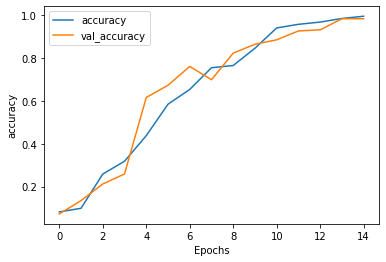

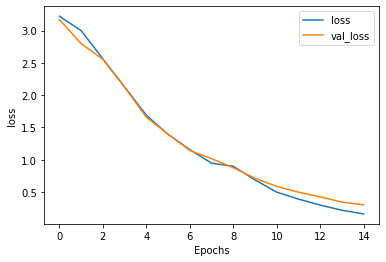

In [26]:
plot_history(history, 'accuracy')
plot_history(history, 'loss')

In [27]:
labels_pred = np.argmax(model.predict(X_test_padded),axis = -1) 
print(labels_pred[0:24])
print(y_test_label_seq[0:24].reshape( 1, -1))

[10 13 11  2  1 23 13 16  8  6 21  1  9 14 20 18 25 12 20  6 10  1  4 25]
[[10 13 11  2  1 23 13 16  8  6  3  1  9 14 20 18 25 12 20 25 10  1  4 25]]


In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy Score")
print(accuracy_score(labels_pred,y_test_label_seq))

Accuracy Score
0.9844559585492227
